In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import os
import japanize_matplotlib.japanize_matplotlib

SEED = 42

In [4]:
SAVE_DIR = os.getcwd().replace('code','images')
os.makedirs(SAVE_DIR,exist_ok=True)
# SAVE_DIR

## 標本平均と標本分散、標本不偏分散の一致性と不偏性について実験して確認する

母集団は以下の3つを試す。

1. 正規分布
2. ポワソン分布
3. ガンマ分布とベータ分布をランダムに組み合わせて作成したノンパラメトリックな母集団

それぞれについて以下の３ステップで実験する。

1. 母集団分布の可視化  
2. 一致性の確認  
   サンプルサイズを増やした時の各推定量が母数に一致するか？
3. 不偏性の確認  
   サンプリング回数を増やした時の各推定量の平均が母数に一致するか？

## 正規分布

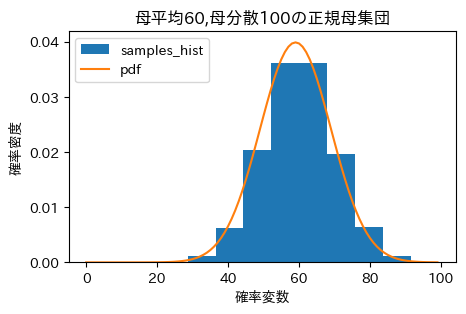

In [8]:
mu = 60 # 母平均の設定
sigma_2 = 10**2 # 母分散の設定
np.random.seed(SEED)
sample = np.random.normal(
	loc=mu,
	scale=np.sqrt(sigma_2),
	size=10000,
	)

plt.figure(figsize=(5,3))

plt.hist(
	sample,
	density=True,
	label='samples_hist',
	)

p = st.norm.pdf(
	x=np.arange(1,101,1),
	loc = mu,
	scale =np.sqrt(sigma_2),
)
plt.plot(p,label='pdf')
plt.legend(loc='best')
plt.xlabel('確率変数')
plt.ylabel('確率密度')
plt.title(f'母平均{mu},母分散{sigma_2}の正規母集団')
plt.savefig(f'{SAVE_DIR}/正規母集団.png',bbox_inches='tight')
plt.show()
plt.close()

### 一致性の検証

サンプルサイズを10〜10,000まで10刻みで増やしていって、標本平均、標本分散、不偏分散がどのように推移するかを確認。  
一致性を満たす場合はサンプルサイズがめちゃくちゃ大きくなった時に推定量が母数と一致していく様子が見えるはず。

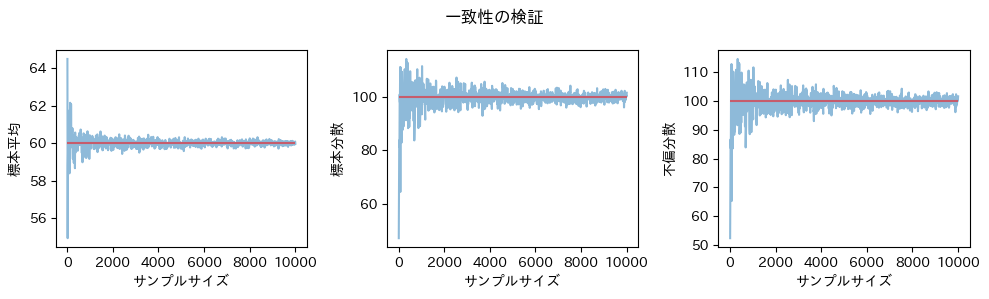

In [9]:
mu = 60 # 母平均の設定
sigma_2 = 10**2 # 母分散の設定
np.random.seed(SEED)

# サンプルサイズは10~10,000を10刻み
sample_size = np.arange(10,10001,10)

x_bar = np.zeros(len(sample_size))
S_2 = np.zeros(len(sample_size))
s_2 = np.zeros(len(sample_size))

for size in sample_size:
	sample = np.random.normal(
		loc=mu,
		scale=np.sqrt(sigma_2),
		size=size,
		)
	x_bar[sample_size==size]=np.mean(sample)
	S_2[sample_size==size]=np.var(sample,ddof=0)
	s_2[sample_size==size]=np.var(sample,ddof=1)
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	[x_bar,S_2,s_2],
	[mu,sigma_2,sigma_2],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		sample_size,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=np.max(sample_size),
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('サンプルサイズ')
	ax.set_ylabel(title)
fig.suptitle('一致性の検証')
plt.savefig(f'{SAVE_DIR}/正規母集団_一致性.png',bbox_inches='tight')
plt.show()

### 不偏性の検証

サンプルサイズは100で固定して、標本平均、標本分散、不偏分散を出す、という試行を1,000回繰り返したとき、それまでに得られた標本平均、標本分散、不偏分散の平均がどのように推移するかを確認。  
不偏性を満たす場合は試行回数がめちゃくちゃ増えたときに、推定量の平均(=期待値)が母数に一致していく様子が見えるはず。

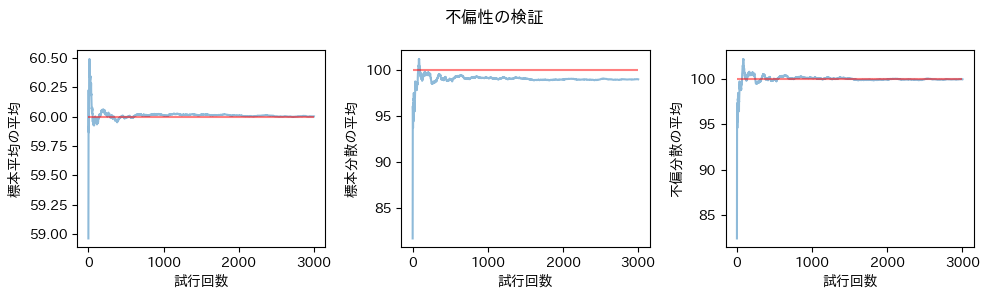

In [10]:
mu = 60 # 母平均の設定
sigma_2 = 10**2 # 母分散の設定
sample_size = 100 # サンプルサイズは100
trial = 3000 # 試行回数を3000回
np.random.seed(SEED)

# 各試行で得られる推定量を格納するリスト
x_bar = []
S_2 = []
s_2 = []

# 各試行終了時の推定量の平均を格納するリスト
mean_x_bar = []
mean_S_2 = []
mean_s_2 = []

for i in range(trial):
	sample = np.random.normal(
		loc=mu,
		scale=np.sqrt(sigma_2),
		size=sample_size
		)
	x_bar.append(np.mean(sample))
	mean_x_bar.append(np.mean(x_bar))
	S_2.append(np.var(sample,ddof=0))
	mean_S_2.append(np.mean(S_2))
	s_2.append(np.var(sample,ddof=1))
	mean_s_2.append(np.mean(s_2))
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	# [x_bar,S_2,s_2],
	[mean_x_bar,mean_S_2,mean_s_2],
	[mu,sigma_2,sigma_2],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		np.arange(trial)+1,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=trial,
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('試行回数')
	ax.set_ylabel(f'{title}の平均')
fig.suptitle('不偏性の検証')
plt.savefig(f'{SAVE_DIR}/正規母集団_不偏性.png',bbox_inches='tight')
plt.show()

## ポワソン分布

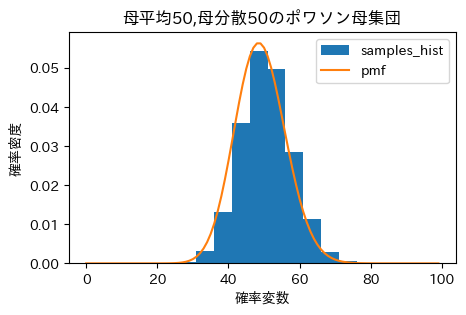

In [12]:
lam = 50 # パラメータ設定
np.random.seed(SEED)
sample = np.random.poisson(
	lam=lam,
	size=10000,
	)

plt.figure(figsize=(5,3))

plt.hist(
	sample,
	density=True,
	label='samples_hist',
	)

p = st.poisson.pmf(
	k=np.arange(1,101,1),
	mu=lam
)
plt.plot(p,label='pmf')
plt.legend(loc='best')
plt.xlabel('確率変数')
plt.ylabel('確率密度')
plt.title(f'母平均{lam},母分散{lam}のポワソン母集団')
plt.savefig(f'{SAVE_DIR}/ポワソン母集団.png',bbox_inches='tight')
plt.show()
plt.close()

### 一致性

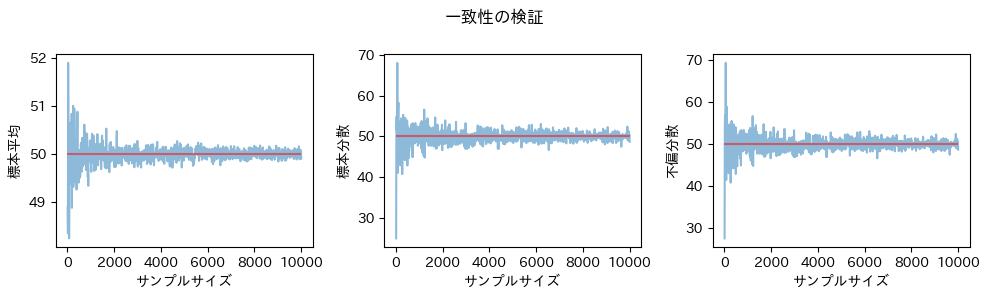

In [13]:
np.random.seed(SEED)

# サンプルサイズは10~10,000を10刻み
sample_size = np.arange(10,10001,10)

x_bar = np.zeros(len(sample_size))
S_2 = np.zeros(len(sample_size))
s_2 = np.zeros(len(sample_size))

for size in sample_size:
	sample = np.random.poisson(
		lam=lam,
		size=size,
		)
	x_bar[sample_size==size]=np.mean(sample)
	S_2[sample_size==size]=np.var(sample,ddof=0)
	s_2[sample_size==size]=np.var(sample,ddof=1)
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	[x_bar,S_2,s_2],
	[lam,lam,lam],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		sample_size,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=np.max(sample_size),
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('サンプルサイズ')
	ax.set_ylabel(title)
fig.suptitle('一致性の検証')
plt.savefig(f'{SAVE_DIR}/ポワソン母集団_一致性.png',bbox_inches='tight')
plt.show()
plt.close()

### 不偏性

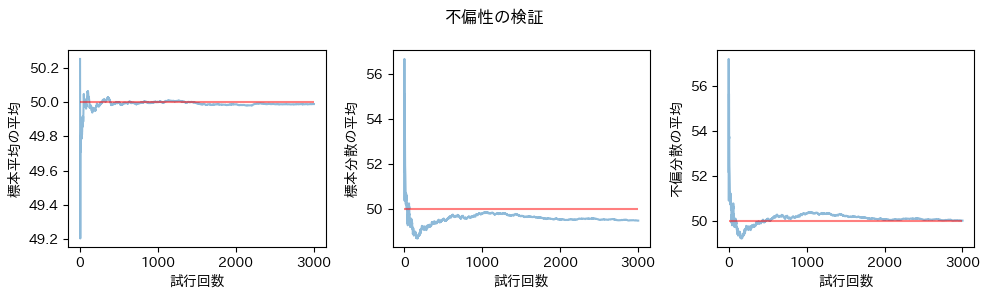

In [14]:
sample_size = 100 # サンプルサイズは100
trial = 3000 # 試行回数を3000回
np.random.seed(SEED)

# 各試行で得られる推定量を格納するリスト
x_bar = []
S_2 = []
s_2 = []

# 各試行終了時の推定量の平均を格納するリスト
mean_x_bar = []
mean_S_2 = []
mean_s_2 = []

for i in range(trial):
	sample = np.random.poisson(
		lam=lam,
		size=sample_size,
		)
	x_bar.append(np.mean(sample))
	mean_x_bar.append(np.mean(x_bar))
	S_2.append(np.var(sample,ddof=0))
	mean_S_2.append(np.mean(S_2))
	s_2.append(np.var(sample,ddof=1))
	mean_s_2.append(np.mean(s_2))
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	# [x_bar,S_2,s_2],
	[mean_x_bar,mean_S_2,mean_s_2],
	[lam,lam,lam],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		np.arange(trial)+1,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=trial,
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('試行回数')
	ax.set_ylabel(f'{title}の平均')
fig.suptitle('不偏性の検証')
plt.savefig(f'{SAVE_DIR}/ポワソン母集団_不偏性.png',bbox_inches='tight')
plt.show()

## ノンパラメトリック分布

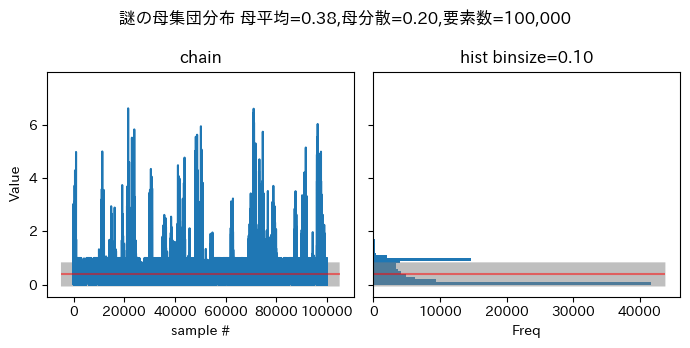

In [17]:
# 乱数ジェネレータのインスタンス作成
rvg = np.random.default_rng()

np.random.seed(SEED)

# ガンマ分布がベータ分布かのどちらかをランダムに選び、
# ランダムに決められたパラメータに基づいて1,000個の乱数を取得、
# という操作を100回繰り返して、ノンパラメトリックな100,000個の
# 数値からなる母集団を作成する。

kinds = [
    rvg.gamma,
    rvg.beta
    ]
each_size = 1000
iter = 100
population=[]

for i in range(iter):
	arg1,arg2 = np.random.rand(2)
	gen = np.random.choice(kinds)
	samples = gen(arg1,arg2,each_size)
	population.append(samples)
population = np.array(population).ravel()

fig,axes = plt.subplots(
	1,2,
	figsize=(7,3.5),
	tight_layout=True,
	sharey=True
)

axes[0].plot(population)
axes[0].set_xlabel('sample #')
axes[0].set_ylabel('Value')
axes[0].set_title('chain')

binwidth = .1
bins=np.arange(np.min(population),np.max(population)+1,binwidth)
axes[1].hist(population,bins=bins,orientation='horizontal')
axes[1].set_xlabel('Freq')
axes[1].set_title(f'hist binsize={binwidth:.2f}')

mu = np.mean(population)
sigma_2 = np.var(population,ddof=0)

for ax in axes:
	xmin,xmax = ax.get_xlim()
	ax.hlines(xmin=xmin,xmax=xmax,y=mu,colors='red',alpha=.5)
	ax.fill_between(
		x=np.linspace(xmin,xmax,1000),
		y1=mu-np.sqrt(sigma_2),
		y2=mu+np.sqrt(sigma_2),
		facecolor='gray',
		alpha=.5
		)

fig.suptitle(f'謎の母集団分布 母平均={mu:.2f},母分散={sigma_2:.2f},要素数={len(population):,}')
plt.savefig(f'{SAVE_DIR}/ノンパラ母集団.png',bbox_inches='tight')
plt.show()

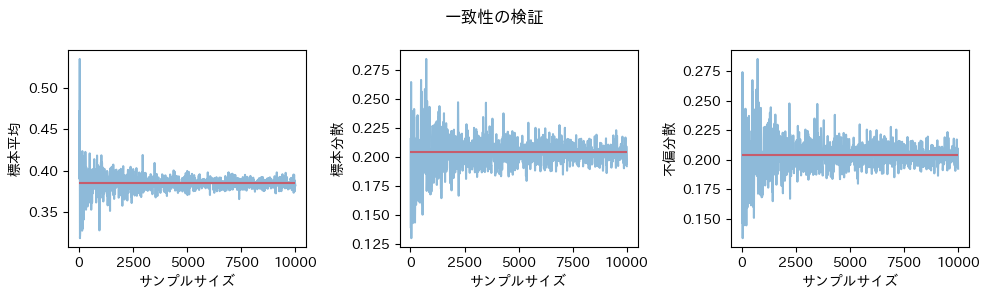

In [21]:
np.random.seed(SEED)

# サンプルサイズは10~10,000を10刻み
sample_size = np.arange(10,10001,10)

x_bar = np.zeros(len(sample_size))
S_2 = np.zeros(len(sample_size))
s_2 = np.zeros(len(sample_size))

for size in sample_size:
	sample = np.random.choice(
		population,
		size=size,
		)
	x_bar[sample_size==size]=np.mean(sample)
	S_2[sample_size==size]=np.var(sample,ddof=0)
	s_2[sample_size==size]=np.var(sample,ddof=1)
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	[x_bar,S_2,s_2],
	[mu,sigma_2,sigma_2],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		sample_size,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=np.max(sample_size),
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('サンプルサイズ')
	ax.set_ylabel(title)
fig.suptitle('一致性の検証')
plt.savefig(f'{SAVE_DIR}/ノンパラ母集団_一致性.png',bbox_inches='tight')
plt.show()

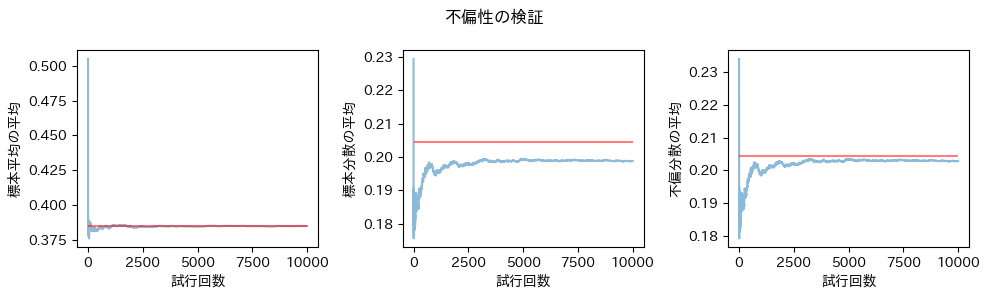

In [22]:
sample_size = 50 # サンプルサイズは100
trial = 10000 # 試行回数を3000回
np.random.seed(SEED)

# 各試行で得られる推定量を格納するリスト
x_bar = []
S_2 = []
s_2 = []

# 各試行終了時の推定量の平均を格納するリスト
mean_x_bar = []
mean_S_2 = []
mean_s_2 = []

for i in range(trial):
	sample = np.random.choice(
		population,
		size=sample_size
		)
	x_bar.append(np.mean(sample))
	mean_x_bar.append(np.mean(x_bar))
	S_2.append(np.var(sample,ddof=0))
	mean_S_2.append(np.mean(S_2))
	s_2.append(np.var(sample,ddof=1))
	mean_s_2.append(np.mean(s_2))
fig, axes = plt.subplots(
	ncols=3,
	nrows=1,
	figsize=(10,3),
	tight_layout=True,
)

for ax,score,answer,title in zip(
	axes,
	# [x_bar,S_2,s_2],
	[mean_x_bar,mean_S_2,mean_s_2],
	[mu,sigma_2,sigma_2],
	['標本平均','標本分散','不偏分散']
	):
	ax.plot(
		np.arange(trial)+1,
		score,
		alpha=.5,
	)
	ax.hlines(
		xmin=0,
		xmax=trial,
		y=answer,
		alpha=0.5,
		colors='r',
	)
	ax.set_xlabel('試行回数')
	ax.set_ylabel(f'{title}の平均')
fig.suptitle('不偏性の検証')
plt.savefig(f'{SAVE_DIR}/ノンパラ母集団_不偏性.png',bbox_inches='tight')
plt.show()